# Linear Regression , Lasso Regerssion and Ridge Regression Models

#### The following site was used to perform data cleaning: https://www.kaggle.com/harlfoxem/housesalesprediction/discussion

In [968]:
# loading libraries
import numpy as np 
#Numpy is the core library for scientific computing in Python. np is an alias pointing to numpy

import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
#Pandas is widely used Python library in data science mainly used for data munging.

import matplotlib as plt

import seaborn as sns 
#Seaborn is a Python visualization library based on matplotlib providing a high-level interface for drawing attractive statistical graphics.


## Step 1 : Importing libraries and the data set:

In [969]:

fp="C:/Vaibhavi/ML & Stat/kc_house_data.csv"

result=pd.read_csv(fp,dtype=object)#accessing fp to read .csv file using pd.read_csv()

result.head() #displays first 5 rows from the dataframe.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Output 1 :
From the first glance at the dataset we can say that , our data set has 21 columns which include the various housing features.However the coulmn names are difficult to interpret and need to be changed.

# Data Cleaning

## Step 2: Quick Data Exploration

In [970]:
result.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

### Output 2:
The above output shows that all the columns are already clean.

## Step 3 : Data Exploration

In [971]:
result.apply(lambda x: sum(x.isnull()),axis=0)

#syntax : apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)
#Return type of apply() depends on whether passed function aggregates, or the reduce argument if the DataFrame is empty.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Output 3: 
Here we were checking the missing values of the dataset.
We can see that there are 0 missing values for each column.

## Step 4 : How to check missing values in dataset?

In [972]:
result.info()

#The info() provides concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null object
date             21613 non-null object
price            21613 non-null object
bedrooms         21613 non-null object
bathrooms        21613 non-null object
sqft_living      21613 non-null object
sqft_lot         21613 non-null object
floors           21613 non-null object
waterfront       21613 non-null object
view             21613 non-null object
condition        21613 non-null object
grade            21613 non-null object
sqft_above       21613 non-null object
sqft_basement    21613 non-null object
yr_built         21613 non-null object
yr_renovated     21613 non-null object
zipcode          21613 non-null object
lat              21613 non-null object
long             21613 non-null object
sqft_living15    21613 non-null object
sqft_lot15       21613 non-null object
dtypes: object(21)
memory usage: 3.5+ MB


### Output 4:
The info() functions also can be used to check the data for null values.

In [973]:
#Some more data exploration:

result.describe()
#syntax of result(): describe(percentiles=None, include=None, exclude=None)
#describe() :Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
unique,21436,372,4028,13,30,1038,9782,6,2,5,...,12,946,306,116,70,70,5034,752,777,8689
top,0795000620,20140623T000000,350000,3,2.5,1300,5000,1,0,0,...,7,1300,0,2014,0,98103,47.5491,-122.29,1540,5000
freq,3,142,172,9824,5380,138,358,10680,21450,19489,...,8981,212,13126,559,20699,602,17,116,197,427


### Output 5:
The above output shows that we are not missing values in the columns as all values are 21613.

In [980]:
#Checking if the missing values are now gone:
# Load the Diabetes Housing dataset
result['price'] = result['price'].astype(float)
result['bedrooms'] = result['bedrooms'].astype(int)
result['bathrooms'] = result['bathrooms'].astype(float)
result['sqft_living'] = result['sqft_living'].astype(float)
result['sqft_lot'] = result['sqft_lot'].astype(float)
result['floors'] = result['floors'].astype(float)
result['waterfront'] = result['waterfront'].astype(float)
result['condition'] = result['condition'].astype(float)
result['grade'] = result['grade'].astype(float)
result['sqft_above'] = result['sqft_above'].astype(float)
result['sqft_basement'] = result['sqft_basement'].astype(float)
result['zipcode'] = result['zipcode'].astype(float)
result['yr_built'] = result['yr_built'].astype(float)
result['yr_renovated'] = result['yr_renovated'].astype(float)
result['sqft_basement'] = result['sqft_basement'].astype(float)
result['lat'] = result['lat'].astype(float)
result['long'] = result['long'].astype(float)
result['sqft_living15'] = result['sqft_living15'].astype(float)
result['sqft_lot15'] = result['sqft_lot15'].astype(float)

result.dtypes

id                object
date              object
price            float64
bedrooms           int32
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view              object
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

## Output 6
As seen in the above output all of the required field are converted to float datatype.

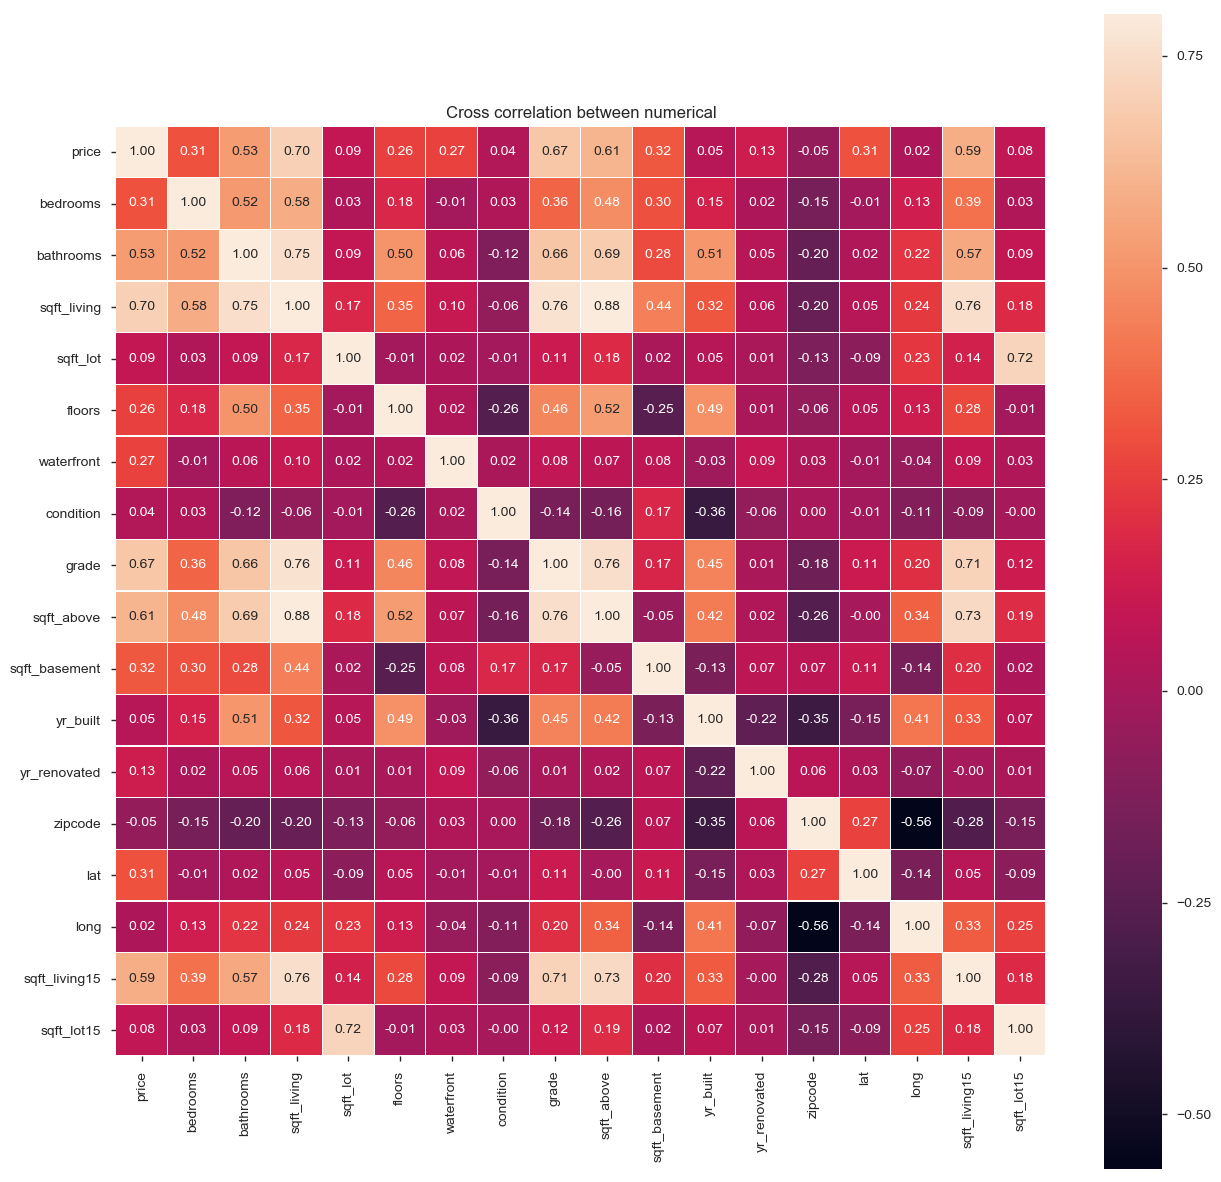

In [981]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(result.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

## Output 7

We can see that the price of house is corelated with the bedrooms, bathrooms, sqft_living,grade, sqft_above,sqft_living15, floor, lat

# Linear Regression

#### Linear Regression is used for predictive analysis. The aim is to find whether a set of predictors can be useful to predict a desired target.

#### The simplest form is regression is : y = c + bx , where x is set of predictors, c is a constant , b is the coefficient of x

#### Multilinear regression is useful when the set of predictors are independent of each other.

In [1027]:
#target
y = result["price"] 

#predictors
X = result[['bedrooms','bathrooms','sqft_living','sqft_above','grade','sqft_living15','waterfront','sqft_basement','floors','lat']]

#Using cross validation to fit the model
#by dividing it into test and train model and then fitting the trained model to the test ata
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [1070]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#Fitting the training data on linear regression model
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1072]:
# print the intercept
print(lm.intercept_)

-31770579.74017276


In [1073]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
#Coefficient of linear regression
coeff_df

,Coefficient
bedrooms,-3.005059e+04
bathrooms,-8.746435e+03
sqft_living,-1.660289e+15
sqft_above,1.660289e+15
grade,8.740510e+04
sqft_living15,1.990069e+01
waterfront,7.869185e+05
sqft_basement,1.660289e+15
floors,-2.443887e+04
lat,6.590948e+05


In [1077]:
#Predicting the target test data using testing features 
predictions = lm.predict(X_test)

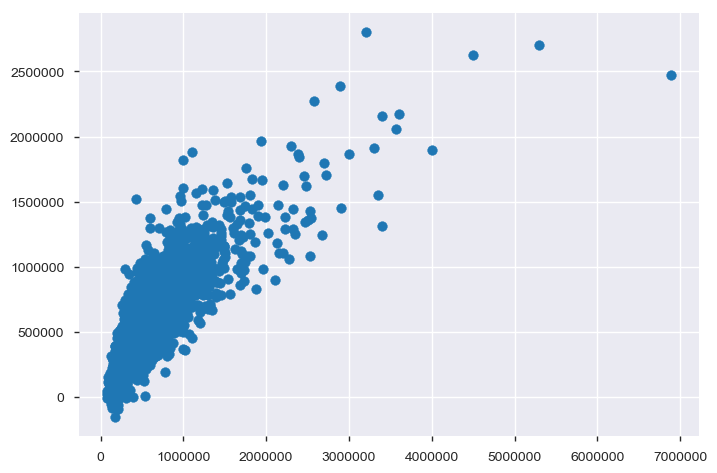

In [1078]:
plt.scatter(y_test,predictions)

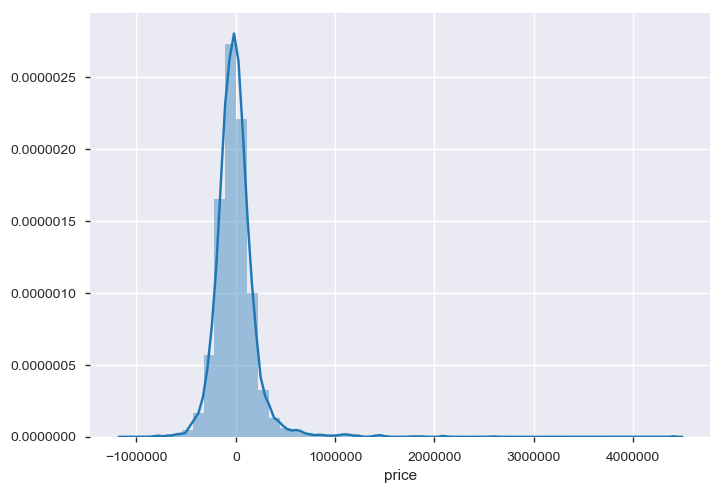

In [1079]:
sns.distplot((y_test-predictions),bins=50);

In [1080]:
accuracy=lm.score(X_test, y_test)
print("Accuracy of linear model is ", accuracy*100)

Accuracy of linear model is  65.5440584734424


In [1081]:
print('Mean absolute error MAE:', metrics.mean_absolute_error(y_test, predictions))
print('Mean squared Error MSE:', metrics.mean_squared_error(y_test, predictions))
print('Root of Mean squared error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean absolute error MAE: 135740.68709162791
Mean squared Error MSE: 47008745743.783905
Root of Mean squared error RMSE: 216815.00350248805


#### Thus, we found that the accuracy of linear regreesion model is 65.54% and mean squared error is 47008745743.783905

# Lasso Regression Model

#### Lasso Regression model is used to predict targets by performing both feature selection and regularization.
#### Lasso regression performs best when some of the predictors have no effect on the output.

In [1085]:
#Traget
y = result["price"]

#Features
X = result[['bedrooms','bathrooms','sqft_living','sqft_above','grade','sqft_living15','waterfront','sqft_basement','floors','lat']]

#Using Cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [1086]:
#Declaring the alpha values constant for lasso model
alphas = 10**np.linspace(10,-2,100)*0.5

In [1091]:
#Finding the best co efficient for Lasso model
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
 lasso.set_params(alpha=a)
 lasso.fit(scale(X_train), y_train)
 coefs.append(lasso.coef_)
lasso.coef_

array([-26895.06408987,  -7885.09140052, 194156.13754548, -16573.04844054,
       102573.59883639,  13856.27095033,  69511.57251672,   4524.06147469,
       -13198.54866203,  91182.72128632])

Text(0,0.5,'weights')

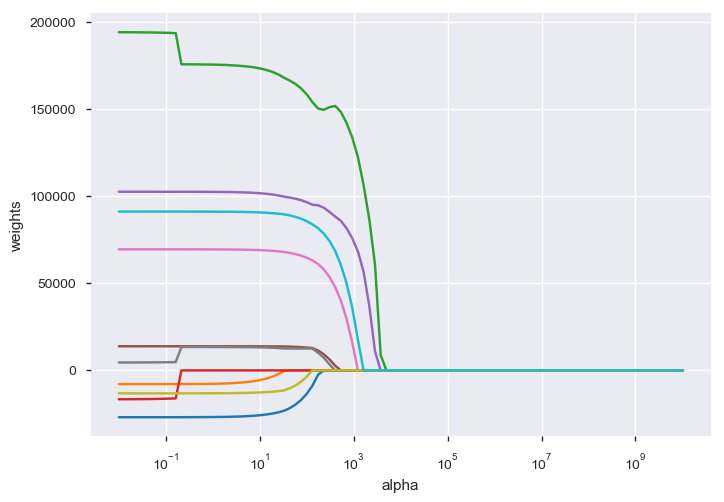

In [1092]:
#Plotting the graph of alpha v/s the coefficients to observe the trend
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Here, we can say that as the aplha values increase,some the coefficients become exactly 0 depending on the alpha

In [1093]:
#Finding the best value of alpha to train the model

lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(scale(X_train), y_train)
lasso.set_params(alpha=lassocv.alpha_)
lassocv.alpha_

1.9491174220787184

In [1094]:
#Fitting the training data on Lasso model
lasso.fit(X_train, y_train)
metrics.mean_squared_error(y_test, lasso.predict(X_test))

47022958587.895065

In [1106]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=lassocv.alpha_)
clf.fit(X_train,y_train)

Lasso(alpha=1.9491174220787184, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [1107]:
print(clf.coef_)

[-2.86953788e+04 -1.02253159e+04  2.12334134e+02 -2.01536383e+01
  8.74287259e+04  2.03265927e+01  7.86613695e+05  1.01720121e+01
 -2.44333688e+04  6.58928689e+05]


In [1108]:
print(clf.intercept_)

-31767418.007677674


In [1109]:
predictions = clf.predict(X_test)

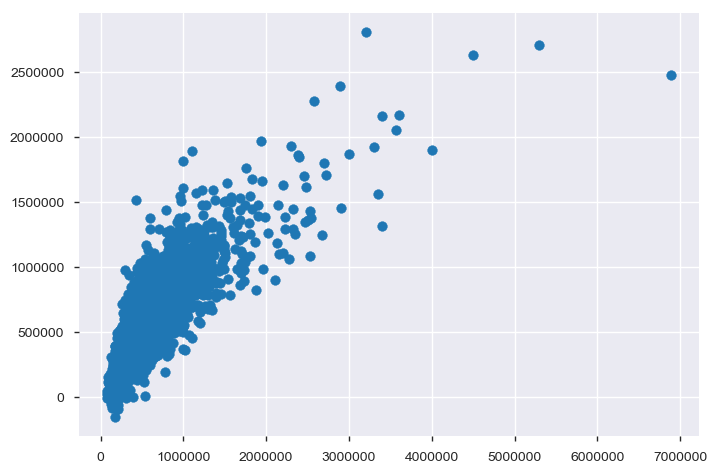

In [1110]:
plt.scatter(y_test,predictions)

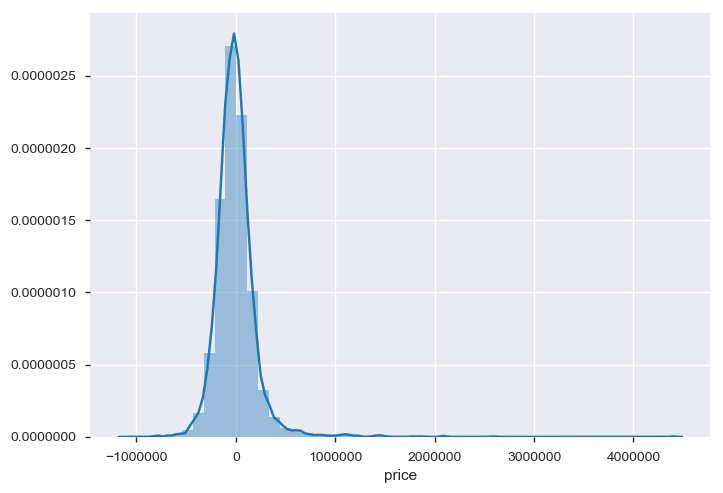

In [1111]:
sns.distplot((y_test-predictions),bins=50);

This graph shows that the predictions are correct as price increases/decreases. But the predictions are incorrect when price is near 0 which means our model is good.

In [1112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 135921.45577444998
MSE: 47019973169.32338
RMSE: 216840.89367396405


In [1115]:
accuracy=clf.score(X_test, y_test)
print("Accuracy of Lasso regression model is ", accuracy*100)

Accuracy of Lasso regression model is  65.5358291213982


In [1116]:
pd.Series(lasso.coef_, index=X.columns)

bedrooms         -28216.027137
bathrooms         -9114.164135
sqft_living         191.183792
sqft_above            0.000000
grade             87161.723817
sqft_living15        20.296870
waterfront       784809.825825
sqft_basement        30.101421
floors           -24049.892519
lat              657654.341455
dtype: float64

As seen above, in Lasso Regression some coefficients are directly made 0 .

#### Here, we can say that Lasso Regression provides accuracy of 65.53% on our data. The mean squared error is 47019973169.32338.

# Ridge Regression

#### Ridge regression is used to perform prediction of target by regularizing the inputs.
#### Ridge regression performs best when the features are co related.

In [1140]:
y = result["price"]

X = result[['bedrooms','bathrooms','sqft_living','sqft_above','grade','sqft_living15','waterfront','sqft_basement','floors','lat']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [1141]:
#Finding the best alpha value for Ridge Regression
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=alphas,scoring='mean_squared_error')
reg.fit(X,y)       

reg.alpha_ 

0.4348745013088917

In [1142]:
from sklearn.linear_model import Ridge
import numpy as np
#n_samples, n_features = 10, 5
#np.random.seed(0)
#y = np.random.randn(n_samples)
#X = np.random.randn(n_samples, n_features)
#X = result[['Width','Length']]
#y = result['Manufacturer']
rlf = Ridge(alpha=reg.alpha_)
rlf.fit(X, y)

Ridge(alpha=0.4348745013088917, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Text(0,0.5,'weights')

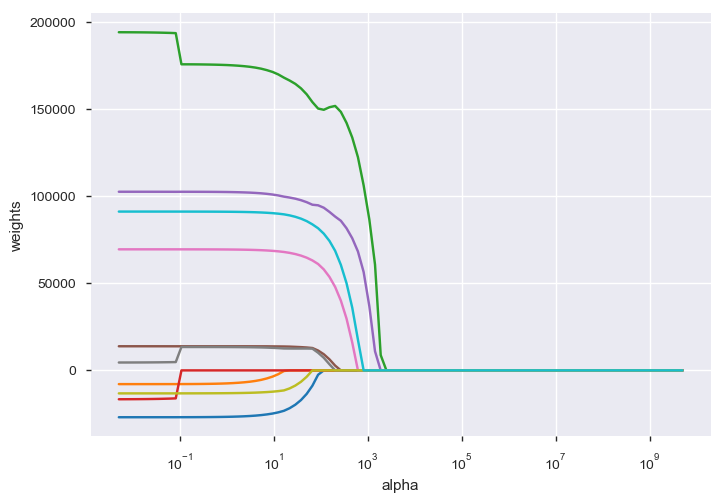

In [1143]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Here, we can see that as the value of alpha increase, the weights(coefficients) become closer 0. However, not many weights are 0 in the beginning.

In [1144]:
print(rlf.coef_)

[-3.03504073e+04 -6.33991128e+03  1.38823850e+02  5.58126992e+01
  8.68389267e+04  1.74340194e+01  8.13408357e+05  8.30085248e+01
 -2.76891993e+04  6.58744835e+05]


In [1145]:
print(rlf.intercept_)

-31751195.90568115


In [1146]:
predictions = rlf.predict(X_test)

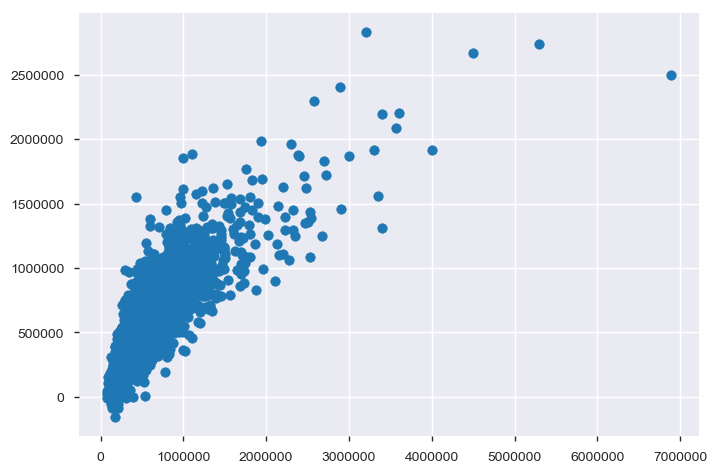

In [1147]:
plt.scatter(y_test,predictions)

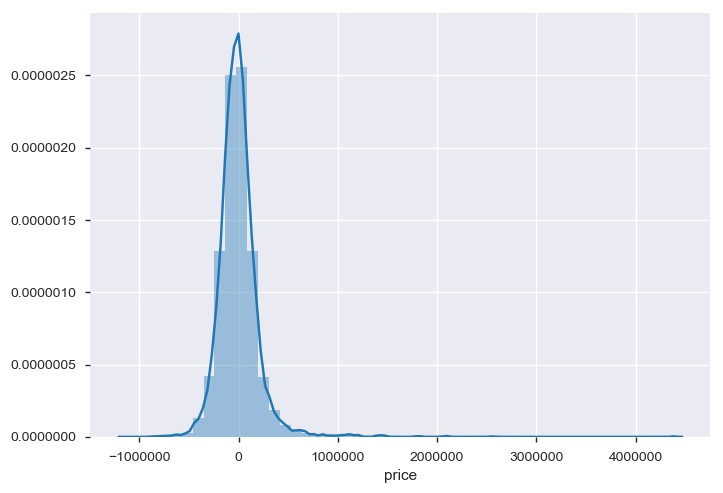

In [1148]:
sns.distplot((y_test-predictions),bins=50);

This graph shows that the predictions are correct as price increases/decreases. But the predictions are incorrect when price is near 0 which means our model is good.

In [1149]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 135883.93113864792
MSE: 46906176227.53482
RMSE: 216578.33739211966


In [1150]:
accuracy=rlf.score(X_test, y_test)
print(accuracy)

0.6561923872338031


In [1151]:
print("Accuracy of Ridge regression model is ", accuracy*100)

Accuracy of Ridge regression model is  65.6192387233803


In [1152]:
pd.Series(rlf.coef_, index=X.columns)

bedrooms         -30350.407289
bathrooms         -6339.911280
sqft_living         138.823850
sqft_above           55.812699
grade             86838.926743
sqft_living15        17.434019
waterfront       813408.356960
sqft_basement        83.008525
floors           -27689.199300
lat              658744.834959
dtype: float64

As seen above, in Ridge regression the coefficients are never made 0 but they are only reduced or increased.

#### Thus, we can day that Ridge regression provides accuracy of 65.61 of our data.
#### Mean squared error is 46906176227.53482 which is lesser than other 2 models.

## Conclusion
#### In our case, all the features (predictors) were important and hence Ridge regression outperformed Lasso giving a slightly better accuracy and lower mean squared error.

### Refereces

http://scikit-learn.org/stable/modules/linear_model.html

http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab10/Lab%2010%20-%20Ridge%20Regression%20and%20the%20Lasso%20in%20Python.pdf

